18-3

In [1]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

<font size=6>**head**</font>

In [2]:
csv_data = pd.read_csv('EuStockMarkets.csv')

In [3]:
csv_data

,DAX,SMI,CAC,FTSE
0,1628.75,1678.1,1772.8,2443.6
1,1613.63,1688.5,1750.5,2460.2
2,1606.51,1678.6,1718.0,2448.2
3,1621.04,1684.1,1708.1,2470.4
4,1618.16,1686.6,1723.1,2484.7
...,...,...,...,...
1855,5460.43,7721.3,3939.5,5587.6
1856,5285.78,7447.9,3846.0,5432.8
1857,5386.94,7607.5,3945.7,5462.2
1858,5355.03,7552.6,3951.7,5399.5


<font size=6>**德國DAX&英國FTSE**</font>

<font size=3>**前提條件數據共有1860除以8年約為1860/8=232.5**</font>
<br>
<font size=3>**一年扣掉假日365-104(52個禮拜*2(六日兩天))=261天**</font>
<br>
<font size=3>**因此扣掉一些國定假日的前提下假設股市資料一年約為233筆()四捨五入**</font>
<br>
<font size=3>**假設數據第一筆是1991年1月1日，所以1996年1月1日就是**</font>
<br>
<font size=3>**1860-(233*5)筆資料=695筆**</font>

In [4]:
print(csv_data.DAX[1164:1859])
print(csv_data.FTSE[1164:1859])

1164    2283.84
1165    2240.24
1166    2241.43
1167    2268.07
1168    2268.35
         ...   
1854    5598.32
1855    5460.43
1856    5285.78
1857    5386.94
1858    5355.03
Name: DAX, Length: 695, dtype: float64
1164    3642.6
1165    3596.1
1166    3576.9
1167    3613.7
1168    3633.3
         ...  
1854    5680.4
1855    5587.6
1856    5432.8
1857    5462.2
1858    5399.5
Name: FTSE, Length: 695, dtype: float64


<font size=6>**FTSE & DAX 回歸模型**</font>

In [5]:
model = sm.OLS(csv_data.FTSE[1164:1859],sm.add_constant(csv_data.DAX[1164:1859])).fit()

C:\Users\RONGF\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<font size=6>**FTSE & DAX 回歸模型 summart()診斷圖**</font>

In [6]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   FTSE   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                 1.651e+04
Date:                Fri, 09 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:45:19   Log-Likelihood:                -4510.1
No. Observations:                 695   AIC:                             9024.
Df Residuals:                     693   BIC:                             9033.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2015.8432     21.020     95.902      0.0

<font size=6>**FTSE & DAX 回歸模型 擬合值**</font>

In [7]:
print(model.fittedvalues)

1164    3653.887709
1165    3622.616368
1166    3623.469875
1167    3642.576951
1168    3642.777776
           ...     
1854    6031.140767
1855    5932.241566
1856    5806.976895
1857    5879.532143
1858    5856.645251
Length: 695, dtype: float64


<font size=6>**FTSE & DAX 回歸模型 擬合值圖**</font>

Text(0, 0.5, '殘差')

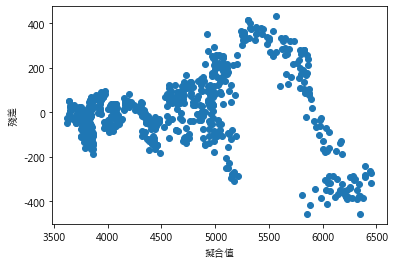

In [8]:
plt.scatter(model.fittedvalues,model.resid)
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] #中文錯誤問題
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel('擬合值')
plt.ylabel('殘差')

<font size=6>**FTSE & DAX 回歸模型 擬合值圖**</font>

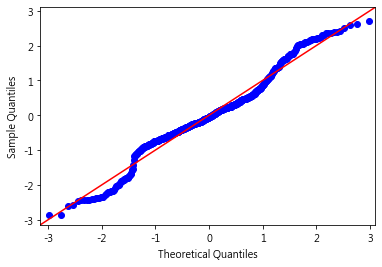

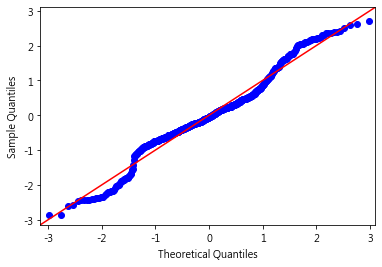

In [9]:
sm.qqplot(model.resid_pearson,stats.norm,line='45')